<H3>FINAL REPORT</H3>

<h2> ⚽️ Relationship Between Gender & Mean Age of Football Olympic Athletes</h2>
<h6>Group 06 :  Alejandro Solano <b>Romero</b>, Apram <b>Ahuja</b>, Aron <b>Bahram</b> , Ruhani <b>Kaur</b> </h6>

<h3>👋 INTRODUCTION</h3>

The aim of this project is to analyze the historical data of Olympic athletes and their performance in various events. The data source for this project is the Kaggle dataset <a href = "https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results">120 years of Olympic history: athletes and results</a>, which was obtained from the <a href = " https://www.sports-reference.com/">Sports Reference</a> (Forman, 2000).

The dataset consists of 271116 records, each representing an individual athlete who participated in an Olympic event. The dataset has 15 attributes, ```ID```, `Name`, `Sex`, `Age`, `Height`, `Weight`, `Team`, `NOC`, `Games`, `Year`, `Season`, `City`, `Sport`, `Event` & `Medal`. The dataset covers the period from 1896 to 2016 and includes both summer and winter Olympics.

<h5>Research Question</h5>
<hr/>
We'll be investigating the question <b>whether gender has any effect on the mean age of Olympic athletes in Football from the year 1900 onwards.</b>

We were interested in this research question as, a previous study shows negative relationship between age and athletes performance in olympics. Bongard V. in his study states that the declines in performance were more in females due to difference in physical development between men and women. As men gain more muscle mass after puberty, women experience more physical changes which alter the physics of their sport, requiring females to re-learn skills as they age (Bongard, V. et al., 2007). However, there is conflicting research which found that predominantly older female football athletes reached the highest levels of competition, thus calling into question whether youth is truly a determining factor in success of female competitors (Barreira et al., 2021) 

Due to this uncertainity in the relationship between gender and age, our parameter of interest would be the difference of mean age in male and female football olympic athletes from 1900 onwards. As well as, the scale parameter that is useful in answering this question would be the variance of age in male and female olympic athletes.

<h3>🧑‍💻 METHODS AND RESULTS </h3>

We downloaded the dataset from : 
https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results 

It was then saved in the ```data/``` in our main github repository

We installed & loaded all the libraries that we might need to pre-process and visualise the dataset.

<h5>Install packages on R kernel</h5>

Run once to install packages before loading them on the notebook

In [1]:
install.packages('cowplot')
install.packages("devtools")
devtools::install_github("UBC-MDS/datateachr")
library(datateachr)
library(tidyverse)
devtools::install_github("UBC-MDS/taxyvr", build_vignettes = TRUE)
library(taxyvr)
install.packages('infer', dependencies = TRUE)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Skipping install of 'datateachr' from a github remote, the SHA1 (78d391f4) has not changed since last install.
  Use `force = TRUE` to force installation

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Skipping install of 'taxyvr' from a github remote, the SHA1 (227a8d8f) has not changed since last install.
  Use `force

<h5>Loading necessary libraries</h5>

In [22]:
library(cowplot)
library(datateachr)
library(broom)
library(dplyr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(ggplot2)
options(repr.matrix.max.rows = 6)

<H3> 📊 Preliminary Results</H3>

In [3]:
data <- read_csv("data/athlete_events.csv")
head(data)

Rows: 271116 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Name, Sex, Team, NOC, Games, Season, City, Sport, Event, Medal
dbl  (5): ID, Age, Height, Weight, Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA


<b>Table 1:</b> Preview of complete dataset from the source

<h5> Cleaning and Wrangling into a tidy format</h5>
<hr/>
For our inferential study, we would look at data from year 1900 & on. As well as, we are accessing Olympic athletes in the event Football Men's/Women's Football. 

1. We'll first filter our data to select only these columns and remove all the dataset with `NA` age values.
2. Now, we'll impute the `NA` medal values with `No` specifying that they didn't won any medal. We won't be removing the examples with `NA` Medal values as it would lead to poor inference by removing the data of athletes who participated in Olympics but didn't win any medal.

In [4]:
football_data <- data %>% 
                        filter(Year >= 1900) %>%
                        filter(!is.na(Age)) %>%
                        filter(Sport == "Football" & (Event == "Football Men's Football" | Event == "Football Women's Football")) %>%
                        select(Sex , Age, Medal) 
print(dim(football_data))
print(sum(is.na(football_data)))
head(football_data)

[1] 6370    3
[1] 4839


Sex,Age,Medal
<chr>,<dbl>,<chr>
M,24,NA
F,23,Bronze
M,28,NA
M,26,NA
M,22,Gold
M,22,NA


<b>Table 2:</b> Preview of Football Data 1900 onwards

In [5]:
football_data$Medal[is.na(football_data$Medal)]<- "No"
print(nrow(football_data))
print(sum(is.na(football_data)))
head(football_data)

[1] 6370
[1] 0


Sex,Age,Medal
<chr>,<dbl>,<chr>
M,24,No
F,23,Bronze
M,28,No
M,26,No
M,22,Gold
M,22,No


<b>Table 3:</b> Preview of Imputed Football Data 1900 onwards

<h5>Sample From the Population of Male/Female Olympic Football Athletes</h5>
<hr/>

Just like in actual world scenario, we take only one sample without replacement from population. Since, our population size is $6370$, taking a sample size which ~10% is better for inference i.e., sample size of $n = 600$, would be ideal for our research question.

- To have a comparable confidence interval and visualizations for each gender we are taking equally sized sample  for both `male` and `female`
- Then, we'll combine and simplify our sampled data by removing the `medals` column as, we're only interested about Olympic athletes and not the medals they won. 

In [6]:
set.seed(1234) #for better reproducibility do not change this

male_sample <- football_data %>%
                  filter(Sex == "M") %>%
                  sample_n(size = 600)
female_sample <- football_data %>%
                  filter(Sex == "F") %>%
                  sample_n(size = 600)

head(male_sample)

Sex,Age,Medal
<chr>,<dbl>,<chr>
M,32,No
M,21,No
M,28,Gold
M,25,No
M,23,No
M,22,No


<b>Table 4:</b> Sample of Male atheletes from filtered football dataset

In [7]:
head(female_sample)

Sex,Age,Medal
<chr>,<dbl>,<chr>
F,17,No
F,20,No
F,23,Bronze
F,26,No
F,28,No
F,22,No


<b>Table 5:</b> Sample of Female atheletes from filtered football dataset

In [8]:
# combining sample for each gender and simplifying it as we don't care about medals won
football_sample <- rbind(male_sample,female_sample) %>%
            ungroup() %>%
            select(-c(Medal))
head(football_sample)

Sex,Age
<chr>,<dbl>
M,32
M,21
M,28
M,25
M,23
M,22


<b>Table 6:</b> Preview of Simplified Combined sample 

<h3>Observed Statistics</h3>

In [9]:
male_summary <- football_sample %>%
                    filter(Sex == "M") %>%
                    summarize(mean = mean(Age), variance = var(Age))
male_summary

mean,variance
<dbl>,<dbl>
23.36333,10.84273


<b>Table 7:</b> Mean and Variance from Male Athlete's Sample

In [10]:
female_summary <- football_sample %>%
                    filter(Sex == "F") %>%
                    summarize(mean = mean(Age), variance = var(Age))
female_summary

mean,variance
<dbl>,<dbl>
24.855,15.51316


<b>Table 8:</b> Mean and Variance from Female Athlete's Sample

<h4> 📈 Visualizations</h4>

As we're interested in the difference in `mean` age for `male` and `female` football olympic athletes and between their respective `variance` i.e., we can look at the histograms of the age distribution for each gender. Additionally, box plot would be great to learn about the spread between these two classes.

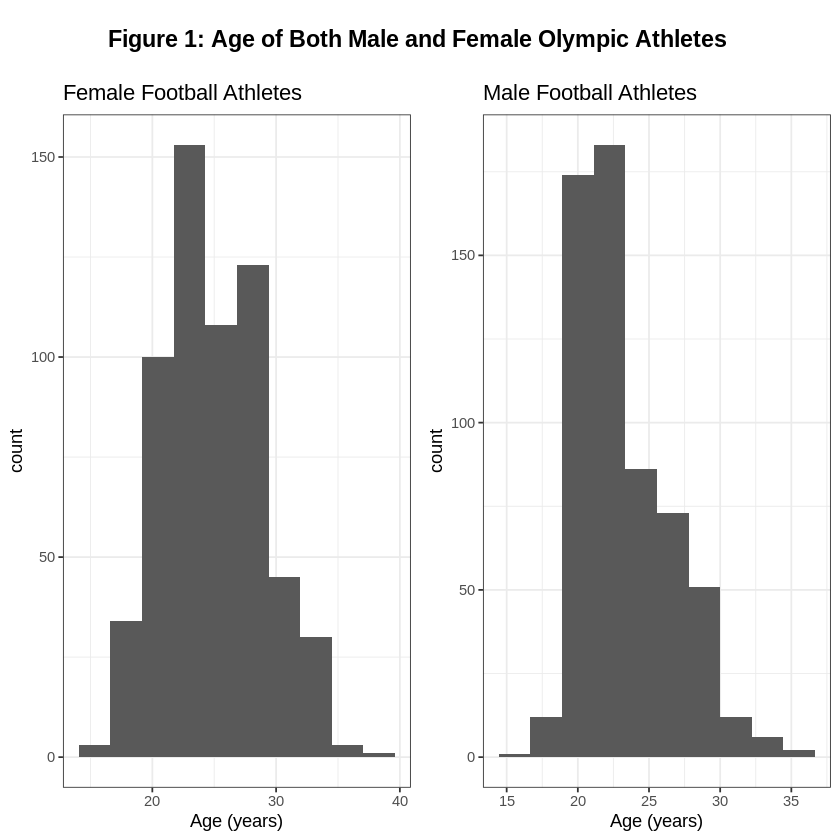

In [11]:
# filtering sample for female athletes and ploting the age distribution
female_age_plot <- football_sample %>%
    filter(Sex == 'F') %>%
    ggplot(aes(x=Age)) +
    geom_histogram(bins = 10) +
    labs(title = "Female Football Athletes",
         x = "Age (years)") +
    theme_bw()

# filtering sample for male athletes and ploting the age distribution
male_age_plot <- football_sample %>%
    filter(Sex == 'M') %>%
    ggplot(aes(x=Age)) +
    geom_histogram(bins = 10) +
    labs(title = "Male Football Athletes",
         x = "Age (years)") +
    theme_bw()

# comparing the distribution plots between the two genders
title <- ggdraw() + draw_label("Figure 1: Age of Both Male and Female Olympic Athletes ", fontface='bold')
grid<- plot_grid(female_age_plot, male_age_plot, rel_widths = c(1, 1), rel_heights = c(1, 1))
age_comparison <- plot_grid(title, grid,ncol=1, rel_heights=c(0.1, 1))
age_comparison

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


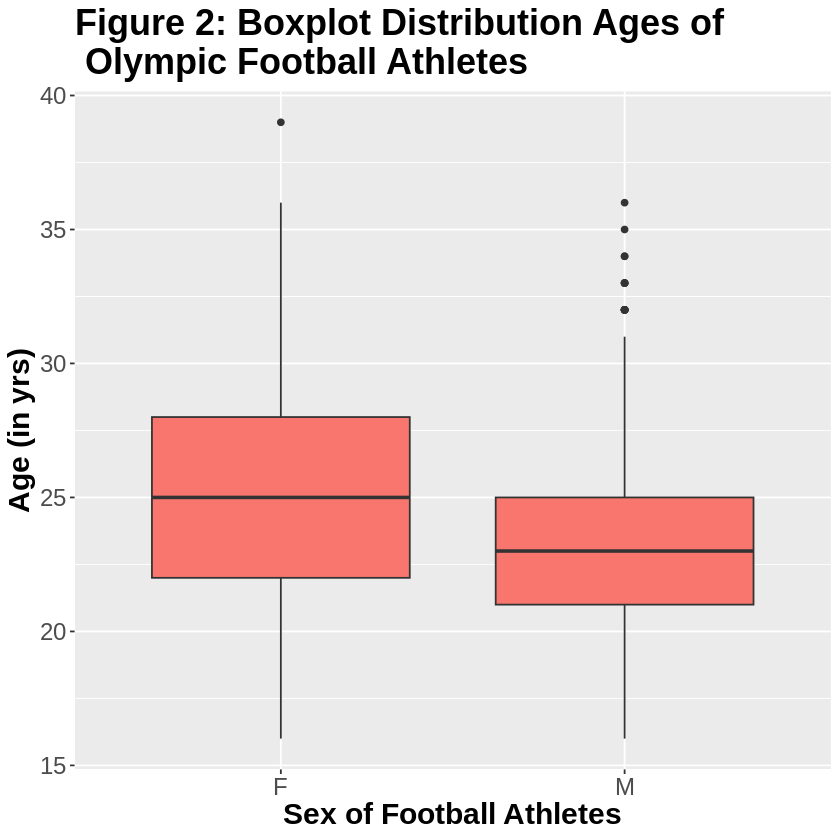

In [12]:
boxplot <- football_sample %>% 
            ggplot() +
            geom_boxplot(aes(Sex , Age, fill = "Blue")) +
            theme(text = element_text(size = 18), title = element_text(face = "bold")) +
            ggtitle("Figure 2: Boxplot Distribution Ages of \n Olympic Football Athletes") + 
            xlab("Sex of Football Athletes") + 
            ylab("Age (in yrs)") + 
            guides(fill = FALSE)
boxplot

<h5>Observed Statistics</h5>

In [13]:
observed_stat <- data.frame(
    male_variance = var(male_sample$Age),
    female_variance = var(female_sample$Age),
    male_mean = mean(male_sample$Age),
    female_mean = mean(female_sample$Age),
    obs_mean_difference = mean(male_sample$Age)-mean(female_sample$Age), #male-female
    obs_variance_difference = var(male_sample$Age)-var(female_sample$Age)) #male-female
observed_stat

male_variance,female_variance,male_mean,female_mean,obs_mean_difference,obs_variance_difference
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.84273,15.51316,23.36333,24.855,-1.491667,-4.670437


<b>Table 9:</b> Observed Statistics from sample

The plots above do address our question as there seem to be some difference in the sample means between these gender as well as there are some evident differences in the spread.

<H2>💡Plan </H2>

The "good thing" about this report is the sample population we are using for the argument, `olympic football athletes` is sampled at random and unbiased fashion. Separating sports competition by gender is often regarded as one of the most controversial topics in the history of sports, especially with the recent rise and push for gender equality. Therefore by using this report, it directly reflects those competing at the highest levels, hence, those who are directly impacted by decision of gender affect on sports. As shown above, we were able to calculate the point estimate mean age, and produce graphs that help us visualize those point estimates that help us draw a relationship between the age and the olympic athletes in both genders.  We see some observed negative differences in Male and Female Athlete's mean & variance of age. However, we know nothing about the reliability of these results. 

<i>This is done from the single sample we took from population, as we're assuming we don't have access to the population</i>

To address this we will be using hypothesis testing:
1. Since we've 2 samples from 2 independent populations (Male and Female), we'll be using 2 sample z-testing as it highly depends on CLT and our dataset does satisy CLT conditions due to large sample size.
2. Later, we'll be using simulation method as it might gain a better approximation accuracy than asymptotic distribution.

We'll also contruct a 95% confidence interval of the difference in mean/variance and check if it contains 0. As for the confidence interval, the sample we are using is really large ($n = 600 > 50$). Therefore a 95% confidence interval should provide a fairly low margin of error, allowing us to prove that the estimates are reliable

<h4>Hypotheses</h4>
<hr/>
For both genders, the hypothesis tests will be:

$$H_{0} : \mu_{Age of Male Football Olymic Athletes} - \mu_{Age of Female Football Olymic Athletes} = 0$$
$$H_{A} : \mu_{Age of Male Football Olymic Athletes} - \mu_{Age of Female Football Olymic Athletes} \not= 0$$

Additionally, for the the scale parameter hypothesis test will be:

$$H_{0} : {\sigma}^2_{Age of Male Football Olymic Athletes} - {\sigma}^2_{Age of Female Football Olymic Athletes} = 0$$
$$H_{A} : {\sigma}^2_{Age of Male Football Olymic Athletes} - {\sigma}^2_{Age of Female Football Olymic Athletes} \not= 0$$

We expect the p-value from the hypothesis test to be less than 0.05 ($ p < 0.05$), as this would indicate that the deviations from the null hypothesis to be statistically significant, allowing us to reject the null hypothesis. 

<h4>Central Limit Theorem</h4>

- <b>Random:</b> To obtain our sample we used random sampling method using `sample_n` such that they're random and unbiased.
- <b>Independent: </b> Both the samples are independent of each other as they're Olympic Athletes of different genders from 1900 onwards.
- <b>Sufficiently Large:</b> Additionally, both sample are approximately 10% of the population i.e., these sample are sufficiently large enough as $n = 600 > 30$

Therefore, we can use normal approximation for the sampling distribution of difference in both mean and variance between `male` and `female`

<h3>Hypotheses Testing</h3>
We'll use a two-tailed test.

<h3>Theory-based (Asymptotic) Method</h3>

<h4>2 sample t-testing for Difference in mean</h4>
<hr/>

In this hypotheses, we will be using a two sample t-test to test the difference between 2 independent populations means, i.e, Male Football Athletes and Female Football Athletes. We are not performing a z-test here becuase we don't have access to the population standard deviation. 

<i> As our assumption was that we've have access to only a single sample </i>


<b>Test Statistic:</b>
$$ T = \frac{\bar{x}-\bar{y}}{\sqrt{\frac{s^{2}_{1}}{n_1}+\frac{s^{2}_2}{n_2} }} $$

Here, $\bar{x}$ and $\bar{y}$ are the mean of Male and Female athlete's sample respectively; as well as $s_1, n_1$ and $s_2,n_2$ are standard deviation, sample size of repective genders

In [14]:
# Dataframe with all the necesaary info for test statistic from the sample above
football_summary <- football_sample |> 
                        group_by(Sex) |>
                        summarise(mean_age = mean(Age),
                                  sd_age = sd(Age),
                                  n = n())
football_summary   

Sex,mean_age,sd_age,n
<chr>,<dbl>,<dbl>,<int>
F,24.85500,3.938675,600
M,23.36333,3.292830,600


<b>Table 10:</b> Athletes Dataset for calculating test-statistic

In [15]:
# calculating test statistic
test_statistic <- (football_summary$mean_age[2] - football_summary$mean_age[1])/
                    (sqrt(football_summary$sd_age[2]^2/football_summary$n[2] + 
                          football_summary$sd_age[1]^2/football_summary$n[1]))
# calculating the degrees of freedom
dof <- (football_summary$sd_age[2]^2/football_summary$n[2] + football_summary$sd_age[1]^2/football_summary$n[1])^2/
     (football_summary$sd_age[2]^4/(football_summary$n[2]^2*(football_summary$n[2] -1)) + 
      football_summary$sd_age[1]^4/(football_summary$n[1]^2*(football_summary$n[1] -1)))

print(test_statistic)
print(dof)

[1] -7.11719
[1] 1161.526


<h4>Plotting the Critical Region and Test Statistic</h4>

[1] 1.963932

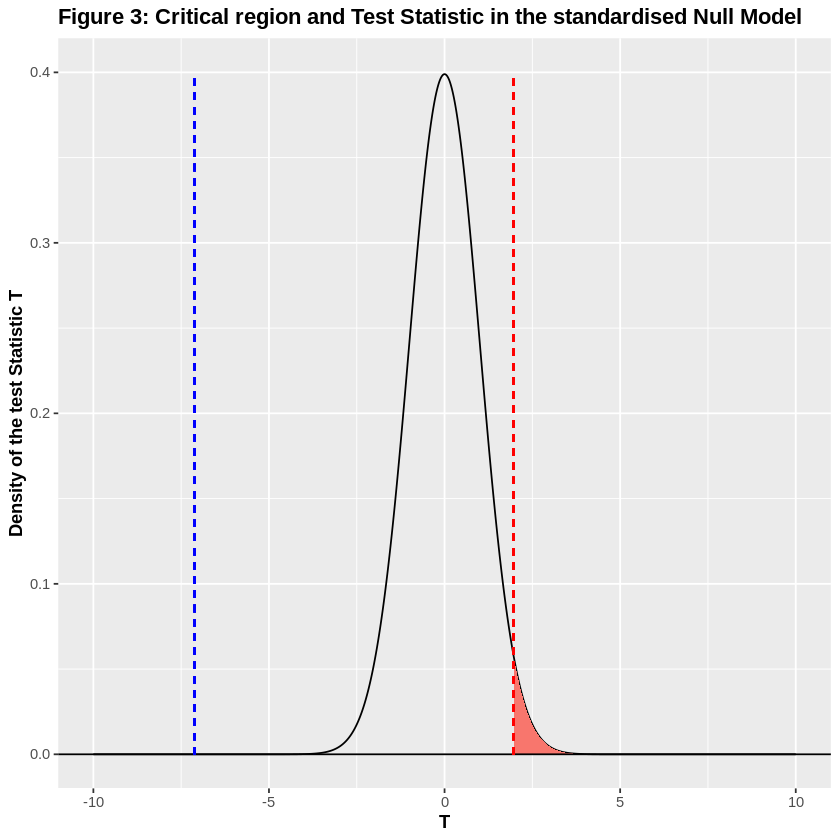

In [61]:
normalDistribution <- data.frame(
  x = seq(-10, 10, by = 0.01),
  y = dnorm(seq(-10, 10, by = 0.01))
)

# Calculate critical value from t-distribution
criticalValue <- qt(0.975, df = dof)  # 0.975 for a two-sided test
criticalValue
shadeNormal <- rbind(c(criticalValue, 0), subset(normalDistribution, x > criticalValue), c(3, 0))

ggplot(normalDistribution, aes(x, y)) +
  geom_line() +
  geom_polygon(data = shadeNormal, aes(x = x, y = y, fill = "red")) +
  guides(fill = "none") +
  geom_hline(yintercept = 0) +
  geom_segment(aes(x = criticalValue, y = 0, xend = criticalValue, yend = 0.4),
               colour = "red", linetype = 'dashed') +
  geom_segment(aes(x = test_statistic, y = 0, xend = test_statistic, yend = 0.4),
               colour = "blue", linetype = 'dashed') +
  ylab("Density of the test Statistic T") +
  xlab("T") +
  ggtitle("Figure 3: Critical region and Test Statistic in the standardised Null Model")+
  theme(title = element_text(face = "bold"))


In [17]:
#calculating the p-value (two-tailed)
p_value <- 2*pt(test_statistic , df = dof, lower.tail = TRUE)
p_value

[1] 1.924257e-12

We use `lower.tail = TRUE` as our `test_statistic` is negative. 
<h4>Interpretation</h4>
Based on the p_value, we can conclude that at a 5% significance level we reject our null hypotheses.
Therefore, The mean age of male football olympic athletes after after 1900 is not the same as the mean age of the female football olympic athletes after 1900.

In [23]:
summary_t_test <- tidy(t.test(x = male_sample$Age , 
                        y = female_sample$Age ,
                        alternative = "two.sided"))
summary_t_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-1.491667,23.36333,24.855,-7.11719,1.924257e-12,1161.526,-1.902877,-1.080456,Welch Two Sample t-test,two.sided


<b>Table 11:</b> Summary of T-test

<h4>ChiSquare for Difference in Variance</h4>
<hr/>

<h3>Simulation-based Method (bootstrapping)</h3>

<h3>Difference in mean</h3>
<hr/>
In this hypotheses, we use `null = "independence"` as dealing with two independent categories of data, and our null hypothesis is that there is no difference in some parameter between the categories. This is used in conjunction with `type = "permute"` in generate.

In [70]:
set.seed(4321)# do not change
# Bootstrapping for estimating Mean Age of Male Football Athletes - Mean Age of Female Football Athletes
football_mean_diff <- football_sample %>%
                    specify(formula=Age ~ Sex)%>%
                    hypothesize(null = "independence") %>%
                    generate(reps=1000, type = "permute")%>%
                    calculate(stat="diff in means", order = c('M','F'))
print(nrow(football_mean_diff))
head(football_mean_diff)

[1] 1000


replicate,stat
<int>,<dbl>
1,0.03833333
2,-0.44166667
3,-0.09500000
4,-0.11833333
5,0.03500000
6,-0.17833333


<b>Table 12:</b> Preview of Difference in Mean (simulation-based) 

In [71]:
mean_diff_ci <- football_mean_diff%>%
get_confidence_interval(level = 0.95)

mean_diff_ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.41525,0.4350833


<b>Table 13:</b> Confidence Interval for mean difference (simulation-based)

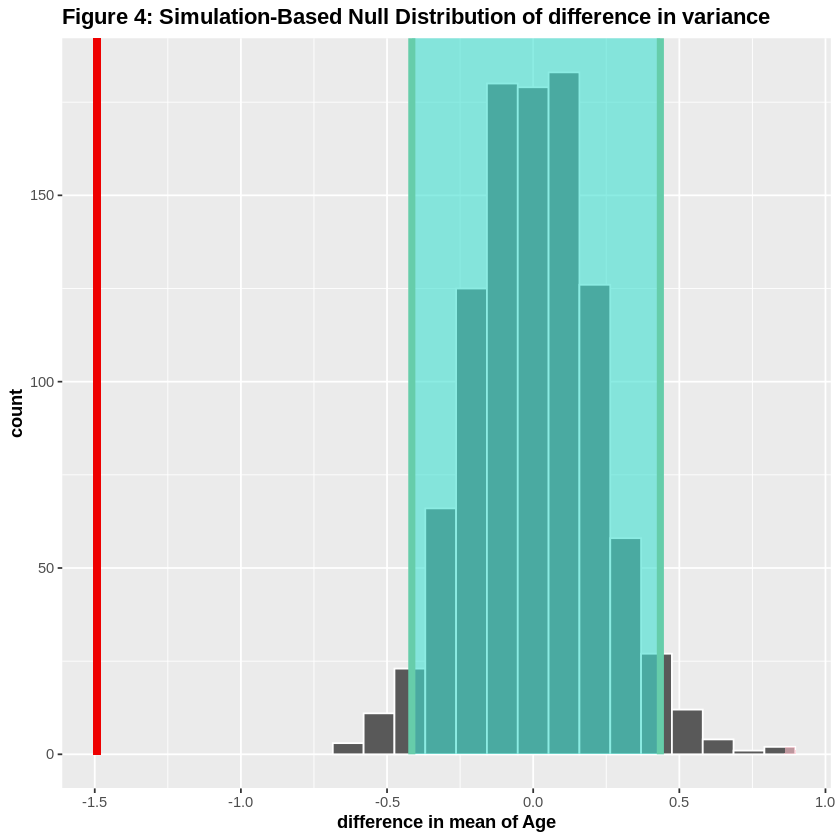

In [75]:
shade_mean_diff <- football_mean_diff %>%
                        visualize() +
                        shade_ci(endpoints = mean_diff_ci) +
                        shade_p_value(observed_stat$obs_mean_difference, direction = "both")+
                        labs(x = "difference in mean of Age")+ 
                        ggtitle("Figure 4: Simulation-Based Null Distribution of difference in variance")+
                        theme(title = element_text(face = "bold"))
shade_mean_diff

In [73]:
# Calculating the p-value
p_value = football_mean_diff %>% get_p_value(obs_stat = observed_stat$obs_mean_difference, direction = "both")
p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


<B>Table 14:</B> The p-value in null model

<h4>Interpretation</h4>

As this `p-value` is less than 0.05 therefore, indicating it is significant enough to reject the null hypothesis. 

<h3>Difference in Variance</h3>
<hr/>

In this hypotheses, we for `difference in variance`we cannot generate null model with `type = "permute"` directly i.e., we generate bootstrap samples and calculate their `variance`. Later, we shift our `stat` to create `null model` for performing simulation-based test.

In [64]:
set.seed(1234) #do not change

football_female_resample_var <- football_sample %>%
                    filter(Sex == "F")%>%
                    specify(response=Age)%>%
                    generate(reps=1000, type = "bootstrap")%>%
                    calculate(stat="sd")%>%
                    mutate(stat = stat^2)

football_diff_in_var <- football_sample %>%
                    filter(Sex == "M")%>%
                    specify(response=Age)%>%
                    generate(reps=1000, type = "bootstrap")%>%
                    calculate(stat="sd")%>%
                    mutate(stat = stat^2 - football_female_resample_var$stat)

print(nrow(football_diff_in_var))
head(football_diff_in_var)

[1] 1000


replicate,stat
<int>,<dbl>
1,-5.189449
2,-4.343486
3,-3.332254
4,-5.300301
5,-4.814224
6,-3.831594


<b>Table 15:</b> Preview of Difference in Variance (simulation-based) 

In [65]:
null_model <- football_diff_in_var %>%
    mutate(stat = stat - observed_stat$obs_variance_difference)

null_model

replicate,stat
<int>,<dbl>
1,-0.5190122
2,0.3269505
3,1.3381831
⋮,⋮
998,0.05934891
999,-0.56194769
1000,0.29841402


<b>Table 16:</b>  Preview of Null Model

In [66]:
football_resample_ci<- null_model %>% 
  get_confidence_interval(level = 0.95, type = "percentile")
football_resample_ci

lower_ci,upper_ci
<dbl>,<dbl>
-2.079729,2.064524


<b>Table 17:</b> Confidence Interval for variance difference (simulation-based)

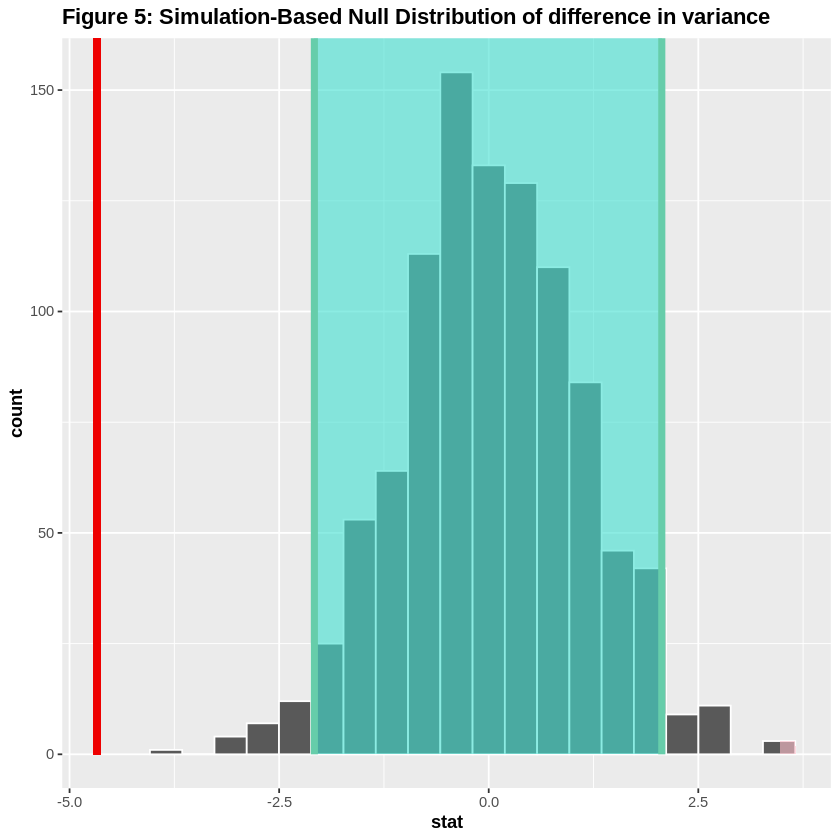

In [74]:
null_model_plot <- null_model %>%
    visualize(bins = 20) +
    shade_ci(endpoints = football_resample_ci) +
    shade_p_value(obs_stat = observed_stat$obs_variance_difference, direction = "both") +
    ggtitle("Figure 5: Simulation-Based Null Distribution of difference in variance")+
    theme(title = element_text(face = "bold"))

null_model_plot

In [69]:
# Calculating the p-value
p_value = null_model %>% get_p_value(obs_stat = observed_stat$obs_variance_difference, direction = "both")
p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


<b>Table 18:</b> The p-value in null model (difference in variance)

<h4>Interpretation</h4>

As this `p-value` is less than 0.05 therefore, indicating it is significant enough to reject the null hypothesis. 

<h3>🎙 Discussion</h3>

Summarize + implications/impact of your findings.

discuss whether your results were what you expected to find


Discuss future questions/research this study could lead to:


This would help us conclude that age does in fact play a role in the performances of athletes for both genders. These findings could be used to argue that sport competitions should or shouldn’t be separated by both gender and age. Leading to some further questions like, Is there a relationship between the Weight Class and Gender for Olympic Football Athletes? Does Gender affect the likeliness of Olympic Football Athletes winning a medal?

<H3>References</H3>

- Bongard, V., McDermott, A. Y., Dallal, G. E., & Schaefer, E. J. (2007). Effects of age and gender on physical performance. AGE, 29(2-3), 77–85. https://doi.org/10.1007/s11357-007-9034-z

- Barreira, J., Bueno, B., & Chiminazzo, J. G. C. (2021). Relative age effect and age of peak performance: an analysis of women’s football players in the Olympic games (1996-2016). In Motriz: Revista de Educação Física (Vol. 27). FapUNIFESP (SciELO). https://doi.org/10.1590/s1980-65742021006921

- Forman, S. (2000). Sports reference . Sports stats, fast, easy, and up-to-date. Retrieved November 4, 2022, from https://www.sports-reference.com/